In [1]:
## load useful libraries
suppressWarnings(suppressPackageStartupMessages(library(rhdf5)))
suppressWarnings(suppressPackageStartupMessages(library(qvalue)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(cowplot)))
suppressWarnings(suppressPackageStartupMessages(library(tidyverse)))
suppressWarnings(suppressPackageStartupMessages(library(ggbeeswarm)))
suppressWarnings(suppressPackageStartupMessages(library(ggthemes)))
suppressWarnings(suppressPackageStartupMessages(library(scater)))
suppressWarnings(suppressPackageStartupMessages(library(SingleCellExperiment)))
suppressWarnings(suppressPackageStartupMessages(library(edgeR)))
suppressWarnings(suppressPackageStartupMessages(library(limma)))
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
# suppressWarnings(suppressPackageStartupMessages(library(ISLR)))
# suppressWarnings(suppressPackageStartupMessages(library(GGally)))
suppressWarnings(suppressPackageStartupMessages(library(scran)))
suppressWarnings(suppressPackageStartupMessages(library(ComplexHeatmap)))
suppressWarnings(suppressPackageStartupMessages(library(circlize)))

In [16]:
sce.file = "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.rds"
sce = readRDS(sce.file)
sce

class: SingleCellExperiment 
dim: 11231 36044 
metadata(4): log.exprs.offset log.exprs.offset log.exprs.offset
  log.exprs.offset
assays(3): tpm counts logcounts
rownames(11231): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(17): exprs_collapsed_to ensembl_transcript_id ...
  is_intop2000hvg is_hvg
colnames(36044): 21843_1#10 21843_1#100 ... 24539_8#97 24539_8#98
colData names(123): adj_x adj_y ... princ_curve princ_curve_scaled01
reducedDimNames(1): PCA
spikeNames(1): ERCC

In [3]:
## day2

In [4]:
get_combinations <- function(sceset, day){
    l = c()
    mysce = sceset[,sceset$day == day]
    mat = table(mysce$donor_short_id, mysce$experiment) 
    ord = which(table(mysce$donor_short_id, mysce$experiment) > 0, arr.ind = T)
    for (i in 1:dim(ord)[1]){
        l[i] = paste0(rownames(mat)[ord[i,1]],"-",colnames(mat)[ord[i,2]])
    }
    l
}

In [5]:
l_day2 <- get_combinations(sce, "day2")

In [6]:
l_day2
length(l_day2)

[1] "dixh_2-expt_21" "fawm_2-expt_21" "koqx_1-expt_21" "naju_1-expt_21"
  [5] "oebj_1-expt_21" "wigw_2-expt_21" "eoxi_6-expt_22" "fawm_2-expt_22"
  [9] "iudw_4-expt_22" "oebj_1-expt_22" "oojs_1-expt_22" "pulk_1-expt_22"
 [13] "babz_3-expt_24" "guyj_2-expt_24" "iisa_1-expt_24" "oikd_2-expt_24"
 [17] "walu_1-expt_24" "iiyk_4-expt_28" "laey_4-expt_28" "letw_1-expt_28"
 [21] "miaj_6-expt_28" "poih_4-expt_28" "rutc_2-expt_28" "aowh_2-expt_29"
 [25] "keui_1-expt_29" "meue_4-expt_29" "naah_2-expt_29" "poih_4-expt_29"
 [29] "vils_1-expt_29" "cicb_2-expt_31" "cuhk_2-expt_31" "hegp_3-expt_31"
 [33] "lepk_1-expt_31" "ueah_1-expt_31" "veku_2-expt_31" "guss_1-expt_32"
 [37] "lepk_1-expt_32" "mita_2-expt_32" "nocf_2-expt_32" "oibg_1-expt_32"
 [41] "datg_2-expt_33" "feec_2-expt_33" "guss_1-expt_33" "nudd_1-expt_33"
 [45] "paab_4-expt_33" "qorq_2-expt_33" "bokz_5-expt_34" "datg_2-expt_34"
 [49] "guss_1-expt_34" "nudd_1-expt_34" "sehl_6-expt_34" "fejf_2-expt_35"
 [53] "nocf_2-expt_35" "nufh_3-expt_35" "wahn_1-expt_35" "wigw_2-expt_35"
 [57] "zagm_1-expt_35" "eiwy_1-expt_36" "kajh_3-expt_36" "lise_3-expt_36"
 [61] "naju_1-expt_36" "puie_5-expt_36" "qoog_4-expt_36" "iezw_2-expt_37"
 [65] "kolf_2-expt_37" "seru_1-expt_37" "uenn_3-expt_37" "wegi_1-expt_37"
 [69] "zerv_8-expt_37" "qaqx_1-expt_38" "rayr_1-expt_38" "sojd_3-expt_38"
 [73] "tolg_6-expt_38" "vass_1-expt_38" "yemz_1-expt_38" "bezi_1-expt_39"
 [77] "heth_1-expt_39" "iisa_3-expt_39" "joxm_1-expt_39" "kucg_2-expt_39"
 [81] "wuye_2-expt_39" "kefb_1-expt_40" "nosn_6-expt_40" "pelm_3-expt_40"
 [85] "tout_1-expt_40" "zapk_3-expt_40" "eipl_1-expt_41" "hayt_1-expt_41"
 [89] "hoik_1-expt_41" "pahc_4-expt_41" "xojn_3-expt_41" "yoch_6-expt_41"
 [93] "bima_1-expt_42" "fiaj_3-expt_42" "giju_2-expt_42" "qihv_1-expt_42"
 [97] "vuna_3-expt_42" "zihe_1-expt_42" "aoxv_3-expt_43" "eesb_1-expt_43"
[101] "kuxp_1-expt_43" "melw_2-expt_43" "qunz_3-expt_43" "yelp_3-expt_43"
[105] "jejf_2-expt_44" "juuy_2-expt_44" "pipw_5-expt_44" "qehq_3-expt_44"
[109] "toco_5-expt_44" "uilk_3-expt_44" "ciwj_2-expt_45" "hajc_1-expt_45"
[113] "hecn_3-expt_45" "kuco_1-expt_45" "liqa_1-expt_45" "tert_1-expt_45"

[1] 116

In [ ]:
get_means_byexpt <- function(sceset, ngenes, l){
    n = length(l)
    means <- matrix(0,nrow = ngenes, ncol = n)
    for (i in 1:n){
        don = gsub("*-.*","",l[i])
        expt = gsub(".*-","",l[i])
        sc <- sceset[,sceset$donor_short_id == don & sceset$experiment == expt]
        if (ncol(sc) > 1){
            sc1 = logcounts(sc)
            means[,i] <- rowMeans(sc1)
        }
        
#         if (length(sc) == nrow(sceset)) {means[,i] <- sc}
#         if (length(sc) == nrow(sceset)) {means[,i] <- sc}
#         else {}
    }
    rownames(means) = rownames(sceset)
    colnames(means) = l
    means
}

In [29]:
sce2 <- sce[,sce$day == "day2"]

In [30]:
sce2

class: SingleCellExperiment 
dim: 11231 8455 
metadata(4): log.exprs.offset log.exprs.offset log.exprs.offset
  log.exprs.offset
assays(3): tpm counts logcounts
rownames(11231): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(17): exprs_collapsed_to ensembl_transcript_id ...
  is_intop2000hvg is_hvg
colnames(8455): 21554_5#102 21554_5#104 ... 24539_2#98 24539_2#99
colData names(123): adj_x adj_y ... princ_curve princ_curve_scaled01
reducedDimNames(1): PCA
spikeNames(1): ERCC

In [44]:
ngenes <- nrow(sce2)
m_day2 <- get_means_byexpt(sce2, ngenes, l_day2)

In [45]:
m_day2[1:5,1:5]

,dixh_2-expt_21,fawm_2-expt_21,koqx_1-expt_21,naju_1-expt_21,oebj_1-expt_21
ENSG00000000003_TSPAN6,4.1649097,4.0942531,3.6179138,4.4201077,3.840111
ENSG00000000419_DPM1,3.6406621,3.8842253,3.9066764,4.2165829,4.212424
ENSG00000000457_SCYL3,0.6261919,0.7977417,0.4117864,0.1440102,1.383384
ENSG00000000460_C1orf112,1.6329359,2.0819377,2.4047571,2.0862696,2.797275
ENSG00000001036_FUCA2,2.1817378,3.0672137,2.7453873,1.4821022,1.488293


In [46]:
write.table(m_day2, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/mean/day2_pheno.txt", sep = "\t", quote = F, col.names = NA)

In [47]:
pcs_day2 = prcomp(t(m_day2))$x[,1:10]
head(pcs_day2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
dixh_2-expt_21,55.74580,-15.72770,14.96495,-3.033870,6.399323,-0.5521687,7.1956878,-11.646490,2.840851,-10.053367
fawm_2-expt_21,54.43760,-13.91246,14.43691,-4.356128,9.561907,1.4133519,-0.2361625,-10.262975,7.199008,-7.742750
koqx_1-expt_21,55.98350,-14.72143,17.25421,-5.330651,11.691351,0.3929939,-1.3550526,-5.521739,7.439460,-8.975210
naju_1-expt_21,62.77487,-25.69162,11.75746,-1.942365,5.933230,-5.4421376,6.1487848,-18.419635,15.754258,-13.016660
oebj_1-expt_21,59.76012,-26.96079,13.66290,8.056225,16.831895,-5.0412748,1.6485296,1.162122,11.748487,-7.295767
wigw_2-expt_21,60.19352,-24.93524,10.98291,6.285706,7.496155,-1.9748196,-4.9357333,17.114129,46.743758,19.764693


In [48]:
write.table(pcs_day2, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/mean/day2_10pcs_covs.txt", sep = "\t", quote = F, col.names = NA)

In [51]:
make_sample_mapping <- function(pheno, sce){
    df <- data.frame(donor.expt = colnames(pheno))
    df$donor = gsub("*-.*","",df$donor.expt)
    df$expt = df$day = gsub(".*-","",df$donor.expt)
    df1 <- data.frame(donor_long_id = unique(sce$donor_long_id), donor = unique(sce$donor_short_id))
    df2 <- left_join(df, df1, by = "donor")
    # genotype_samples phenotype_samples
    samples = df2[,c("donor_long_id","donor.expt")]
    colnames(samples) = c()
    samples
}

In [52]:
samples = make_sample_mapping(m_day2, sce2)
head(samples)

HPSI0614i-dixh_2,dixh_2-expt_21
HPSI0215i-fawm_2,fawm_2-expt_21
HPSI0614i-koqx_1,koqx_1-expt_21
HPSI0414i-naju_1,naju_1-expt_21
HPSI0714i-oebj_1,oebj_1-expt_21
HPSI0314i-wigw_2,wigw_2-expt_21


In [53]:
write.table(samples, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/mean/day2_samples.txt", sep = "\t", quote = F, col.names = NA)

In [ ]:
### stages

In [3]:
sce.hvg = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.slalom.is_intop2000hvg.rds")
sce$stage = sce.hvg$stage

In [2]:
get_combinations <- function(sceset, daylist){
    k = 0
    print (daylist)
    for(j in 1:length(daylist)){
        print (daylist[j])
        mysce = sceset[,sceset$day == daylist[j]]
        mat = table(mysce$donor, mysce$experiment) 
        ord = which(table(mysce$donor, mysce$experiment) > 0, arr.ind = T)
        print(ord) 
        l = c()
        for (i in 1:dim(ord)[1]){
#              print(k)
            l[k] <- paste0(rownames(mat)[ord[i,1]],"-",colnames(mat)[ord[i,2]],"-",daylist[j])
            k = k + 1
        }
        
    }
    l
}

In [32]:
sce$pseudo = sce$PC1_top500hvgs

In [8]:
sce$stage = "not assigned"

# just assign all day0 cells to ips
sce[,sce$day == "day0"]$stage = "ips"
# still based on not scale PC1, since those are the criteria used for eQTLs
sce[,sce$PC1_top500hvgs  > -23 & sce$PC1_top500hvgs < 4 & sce$day %in% c("day1","day2")]$stage = "mesendo"
sce[,sce$PC1_top500hvgs  > 22 & sce$day %in% c("day2","day3")]$stage = "defendo"

In [12]:
# sce.ips = sce[,sce$stage == "ips"]
# sce.mesendo = sce[,sce$stage == "mesendo"]
# sce.defendo = sce[,sce$stage == "defendo"]
sce.transit = sce[,sce$stage == "not assigned" & !(sce$day == "day0")]

In [13]:
ncol(sce.transit)
length(unique(sce.transit$donor_short_id))

[1] 6387

[1] 118

In [14]:
sceset = sce.transit
mysce = sceset[,sceset$day == "day1"]
mat = table(mysce$donor_short_id, mysce$experiment) 
ord = which(table(mysce$donor_short_id, mysce$experiment) > 0, arr.ind = T)
l = c()
for (i in 1:dim(ord)[1]){
    l[i] <- paste0(rownames(mat)[ord[i,1]],"-",colnames(mat)[ord[i,2]])
    }
l1 = paste0(l,"-day1")
mysce = sceset[,sceset$day == "day2"]
mat = table(mysce$donor_short_id, mysce$experiment) 
ord = which(table(mysce$donor_short_id, mysce$experiment) > 0, arr.ind = T)
l = c()
for (i in 1:dim(ord)[1]){
    l[i] <- paste0(rownames(mat)[ord[i,1]],"-",colnames(mat)[ord[i,2]])
    }
l2 = paste0(l,"-day2")
mysce = sceset[,sceset$day == "day3"]
mat = table(mysce$donor_short_id, mysce$experiment) 
ord = which(table(mysce$donor_short_id, mysce$experiment) > 0, arr.ind = T)
l = c()
for (i in 1:dim(ord)[1]){
    l[i] <- paste0(rownames(mat)[ord[i,1]],"-",colnames(mat)[ord[i,2]])
    }
l3 = paste0(l,"-day3")
l.transit <- c(l1,l2,l3)

In [15]:
length(l.transit)

[1] 313

In [7]:
sceset = sce.ips
mysce = sceset[,sceset$day == "day0"]
mat = table(mysce$donor_short_id, mysce$experiment) 
ord = which(table(mysce$donor_short_id, mysce$experiment) > 0, arr.ind = T)
l = c()
for (i in 1:dim(ord)[1]){
    l[i] <- paste0(rownames(mat)[ord[i,1]],"-",colnames(mat)[ord[i,2]])
    }
l.ips = paste0(l,"-day0")

In [8]:
sceset = sce.mesendo
mysce = sceset[,sceset$day == "day1"]
mat = table(mysce$donor_short_id, mysce$experiment) 
ord = which(table(mysce$donor_short_id, mysce$experiment) > 0, arr.ind = T)
l = c()
for (i in 1:dim(ord)[1]){
    l[i] <- paste0(rownames(mat)[ord[i,1]],"-",colnames(mat)[ord[i,2]])
    }
l1 = paste0(l,"-day1")
mysce = sceset[,sceset$day == "day2"]
mat = table(mysce$donor_short_id, mysce$experiment) 
ord = which(table(mysce$donor_short_id, mysce$experiment) > 0, arr.ind = T)
l = c()
for (i in 1:dim(ord)[1]){
    l[i] <- paste0(rownames(mat)[ord[i,1]],"-",colnames(mat)[ord[i,2]])
    }
l2 = paste0(l,"-day2")
l.mesendo <- c(l1,l2)

In [9]:
sceset = sce.defendo
mysce = sceset[,sceset$day == "day2"]
mat = table(mysce$donor_short_id, mysce$experiment) 
ord = which(table(mysce$donor_short_id, mysce$experiment) > 0, arr.ind = T)
l = c()
for (i in 1:dim(ord)[1]){
    l[i] <- paste0(rownames(mat)[ord[i,1]],"-",colnames(mat)[ord[i,2]])
    }
l2 = paste0(l,"-day2")
mysce = sceset[,sceset$day == "day3"]
mat = table(mysce$donor_short_id, mysce$experiment) 
ord = which(table(mysce$donor_short_id, mysce$experiment) > 0, arr.ind = T)
l = c()
for (i in 1:dim(ord)[1]){
    l[i] <- paste0(rownames(mat)[ord[i,1]],"-",colnames(mat)[ord[i,2]])
    }
l3 = paste0(l,"-day3")
l.defendo <- c(l2,l3)

In [16]:
get_means_byexpt <- function(sceset, ngenes, l){
    n = length(l)
    means <- matrix(0,nrow = ngenes, ncol = n)
    for (i in 1:n){
        don = gsub("*-.*","",l[i])
        expt = gsub("*-.*","",gsub(".*-e","e",l[i]))
        day = gsub(".*-","",l[i])
        sc <- logcounts(sceset)[,sceset$donor_short_id == don & sceset$experiment == expt & sceset$day == day]
        # print(length(sc))
        if (length(sc) == nrow(sceset)) {means[,i] <- sc}
        else {means[,i] <- rowMeans(sc)}
    }
    rownames(means) = rownames(sceset)
    colnames(means) = l
    means
}

In [13]:
get_variances_byexpt <- function(sceset, ngenes, l){
    n = length(l)
    vars <- matrix(0,nrow = ngenes, ncol = n)
    for (i in 1:n){
        don = gsub("*-.*","",l[i])
        expt = gsub("*-.*","",gsub(".*-e","e",l[i]))
        day = gsub(".*-","",l[i])
        sc <- logcounts(sceset)[,sceset$donor_short_id == don & sceset$experiment == expt & sceset$day == day]
        # print(length(sc))
        if (length(sc) == nrow(sceset)) {vars[,i] <- sc}
        else {vars[,i] <- apply(sc,1,var)}
    }
    rownames(vars) = rownames(sceset)
    colnames(vars) = l
    vars
}

In [65]:
get_logmeans_byexpt <- function(sceset, ngenes, l){
    n = length(l)
    means <- matrix(0,nrow = ngenes, ncol = n)
    for (i in 1:n){
        don = gsub("*-.*","",l[i])
        expt = gsub("*-.*","",gsub(".*-e","e",l[i]))
        day = gsub(".*-","",l[i])
        sc <- counts(sceset)[,sceset$donor_short_id == don & sceset$experiment == expt & sceset$day == day]
        # print(length(sc))
        if (length(sc) == nrow(sceset)) {means[,i] <- log2(sc + 1)}
        else {means[,i] <- log2(rowMeans(sc)+1)}
    }
    rownames(means) = rownames(sceset)
    colnames(means) = l
    means
}

In [66]:
get_logvariances_byexpt <- function(sceset, ngenes, l){
    n = length(l)
    vars <- matrix(0,nrow = ngenes, ncol = n)
    for (i in 1:n){
        don = gsub("*-.*","",l[i])
        expt = gsub("*-.*","",gsub(".*-e","e",l[i]))
        day = gsub(".*-","",l[i])
        sc <- counts(sceset)[,sceset$donor_short_id == don & sceset$experiment == expt & sceset$day == day]
        # print(length(sc))
        if (length(sc) == nrow(sceset)) {vars[,i] <- log2(sc + 1)}
        else {vars[,i] <- log2(apply(sc,1,var)+1)}
    }
    rownames(vars) = rownames(sceset)
    colnames(vars) = l
    vars
}

In [ ]:
# l.ips
# l.mesendo
# l.defendo

In [51]:
# m.ips = get_means_byexpt(sce.ips, nrow(sce.ips), l.ips)
# m.mesendo = get_means_byexpt(sce.mesendo, nrow(sce.mesendo), l.mesendo)
m.defendo = get_means_byexpt(sce.defendo, nrow(sce.defendo), l.defendo)

In [17]:
m.transit = get_means_byexpt(sce.transit, nrow(sce.transit), l.transit)

In [18]:
m.transit[1:5,1:5]

,fafq_1-expt_09-day1,fafq_1-expt_10-day1,hayt_1-expt_10-day1,sojd_3-expt_10-day1,wopl_1-expt_10-day1
ENSG00000000003_TSPAN6,6.0157926,6.1647125,6.1862809,6.7787334,5.572450
ENSG00000000419_DPM1,6.2606651,6.3307959,6.1193524,6.8160183,6.527754
ENSG00000000457_SCYL3,0.9125461,0.9676321,0.8152496,0.4055402,0.361470
ENSG00000000460_C1orf112,3.1033389,2.7937279,3.9285240,3.1062360,1.423597
ENSG00000001036_FUCA2,2.5664671,3.4514574,2.0671516,1.9703181,2.912155


In [20]:
write.table(m.transit, "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/eQTL_mapping/input_files/transit_pheno.txt", sep = "\t", quote = F, col.names = NA)

In [21]:
pcs.transit = prcomp(t(m.transit))$x[,1:10]

head(pcs.transit,2)

write.table(pcs.transit, "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/eQTL_mapping/input_files/transit_covs_10pcs.txt", sep = "\t", quote = F, col.names = NA)

smf.transit = make_sample_mapping(m.transit, sce.transit)
head(smf.transit,2)

write.table(smf.transit, "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/eQTL_mapping/input_files/transit_smf.txt", sep = "\t", quote = F, row.names = F, col.names = F)

In [52]:
# write.table(m.ips, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/mean/variance/ips_pheno.txt", sep = "\t", quote = F, col.names = NA)
# write.table(m.mesendo, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/mean/variance/mesendo_pheno.txt", sep = "\t", quote = F, col.names = NA)
write.table(m.defendo, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/mean/variance/defendo_pheno.txt", sep = "\t", quote = F, col.names = NA)

In [46]:
head(get_means_byexpt(sce.ips, nrow(sce.ips), l.ips[1:2]))

,heth_1-expt_12-day0,jogf_2-expt_12-day0
ENSG00000000003_TSPAN6,5.361901,5.707035
ENSG00000000419_DPM1,5.901928,6.045002
ENSG00000000457_SCYL3,0.872867,0.699406
ENSG00000000460_C1orf112,2.865806,2.987976
ENSG00000001036_FUCA2,4.070597,4.448039
ENSG00000001084_GCLC,1.891021,2.489428


In [15]:
# get_variances_byexpt(sce.ips, nrow(sce.ips), l.ips[1:2])

In [71]:
logm.ips = get_logmeans_byexpt(sce.ips, nrow(sce.ips), l.ips)
logm.mesendo = get_logmeans_byexpt(sce.mesendo, nrow(sce.mesendo), l.mesendo)
logm.defendo = get_logmeans_byexpt(sce.defendo, nrow(sce.defendo), l.defendo)
logv.ips = get_logvariances_byexpt(sce.ips, nrow(sce.ips), l.ips)
logv.mesendo = get_logvariances_byexpt(sce.mesendo, nrow(sce.mesendo), l.mesendo)
logv.defendo = get_logvariances_byexpt(sce.defendo, nrow(sce.defendo), l.defendo)

In [72]:
write.table(logv.ips, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/logvariance/ips_pheno.txt", sep = "\t", quote = F, col.names = NA)
write.table(logv.mesendo, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/logvariance/mesendo_pheno.txt", sep = "\t", quote = F, col.names = NA)
write.table(logv.defendo, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/logvariance/defendo_pheno.txt", sep = "\t", quote = F, col.names = NA)

In [74]:
write.table(logm.ips, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/logmean/ips_pheno.txt", sep = "\t", quote = F, col.names = NA)
write.table(logm.mesendo, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/logmean/mesendo_pheno.txt", sep = "\t", quote = F, col.names = NA)
write.table(logm.defendo, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/logmean/defendo_pheno.txt", sep = "\t", quote = F, col.names = NA)

In [16]:
v.ips = get_variances_byexpt(sce.ips, nrow(sce.ips), l.ips)
v.mesendo = get_variances_byexpt(sce.mesendo, nrow(sce.mesendo), l.mesendo)
v.defendo = get_variances_byexpt(sce.defendo, nrow(sce.defendo), l.defendo)

In [17]:
write.table(v.ips, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/variance/ips_pheno.txt", sep = "\t", quote = F, col.names = NA)
write.table(v.mesendo, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/variance/mesendo_pheno.txt", sep = "\t", quote = F, col.names = NA)
write.table(v.defendo, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/variance/defendo_pheno.txt", sep = "\t", quote = F, col.names = NA)

In [28]:
make_sample_mapping <- function(pheno, sce){
    df <- data.frame(donor.expt.day = colnames(pheno))
    df$donor = gsub("*-.*","",df$donor.expt.day)
    df$expt = gsub(".*-","",df$donor.expt.day)
    df$day = gsub(".*-","",df$donor.expt.day)
    df1 <- data.frame(donor_long_id = unique(sce$donor_long_id), donor = unique(sce$donor_short_id))
    df2 <- left_join(df, df1, by = "donor")
    # genotype_samples phenotype_samples
    samples = df2[,c("donor_long_id","donor.expt.day")]
    colnames(samples) = c()
    samples
}

In [62]:
logv.ips.pcs = prcomp(t(logv.ips))$x[,1:10]
logv.mesendo.pcs = prcomp(t(logv.mesendo))$x[,1:10]
logv.defendo.pcs = prcomp(t(logv.defendo))$x[,1:10]

In [68]:
rownames(logv.ips.pcs) <- gsub("\\.","-",rownames(logv.ips.pcs))

In [69]:
head(logv.ips.pcs)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
heth_1-expt_12-day0,-6.486316,-18.20235,15.118927,-13.99638,21.67478,-42.63407,-21.17451,9.2048657,-4.778650,7.693134
jogf_2-expt_12-day0,-36.569502,-22.33952,11.751562,-14.88398,21.60292,-37.19546,-19.23046,15.0144305,-12.914657,12.112019
pelm_3-expt_12-day0,20.335331,-17.77234,-6.999235,-25.97078,10.61019,-24.26406,-13.34456,1.8979842,-4.185246,6.339128
vass_1-expt_12-day0,-8.458523,-24.75527,-12.705372,-22.63394,18.23839,-23.56621,-30.75585,4.8517972,-6.717445,7.401873
wibj_2-expt_12-day0,-33.991451,-19.22291,-16.039861,-23.17773,18.20519,-26.25620,-31.13529,0.5280875,-7.893783,17.072283
zapk_3-expt_12-day0,-9.363528,-18.44705,-6.555730,-22.12398,16.55165,-29.68504,-22.09364,5.9267441,-11.531506,13.273404


In [70]:
write.table(logv.ips.pcs, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/logvariance/ips_covs.txt", sep = "\t", quote = F, col.names = NA)
write.table(logv.mesendo.pcs, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/logvariance/mesendo_covs.txt", sep = "\t", quote = F, col.names = NA)
write.table(logv.defendo.pcs, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/logvariance/defendo_covs.txt", sep = "\t", quote = F, col.names = NA)

In [19]:
v.ips.pcs = prcomp(t(v.ips))$x[,1:10]
v.mesendo.pcs = prcomp(t(v.mesendo))$x[,1:10]
v.defendo.pcs = prcomp(t(v.defendo))$x[,1:10]

In [23]:
head(v.ips.pcs)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
heth_1-expt_12-day0,-11.03862,-2.200217,-3.11308769,4.499252,-13.9969709,-1.243655,4.4809198,-18.595166,17.0597518,-1.1052040
jogf_2-expt_12-day0,-30.03647,8.343634,2.78759785,9.396257,-0.1027375,-3.706962,3.0236176,-14.190737,11.4755250,-0.5701951
pelm_3-expt_12-day0,-38.18046,8.780247,0.94345998,6.286670,6.6621013,-4.516840,-0.6094867,-7.020513,2.2391701,1.8878555
vass_1-expt_12-day0,-30.39039,7.789929,0.03758508,5.211005,6.1607393,-6.053048,-2.8723278,-7.166499,-1.2312772,1.6921732
wibj_2-expt_12-day0,-41.89318,10.780541,3.63176275,5.181475,9.5836592,-5.632977,-1.2954557,-5.828410,-0.4343722,2.1316619
zapk_3-expt_12-day0,-36.31590,9.199315,3.07447715,7.865155,6.9087012,-5.129037,0.3591091,-10.261062,4.6287877,0.7582819


In [24]:
write.table(v.ips.pcs, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/variance/ips_covs.txt", sep = "\t", quote = F, col.names = NA)
write.table(v.mesendo.pcs, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/variance/mesendo_covs.txt", sep = "\t", quote = F, col.names = NA)
write.table(v.defendo.pcs, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/variance/defendo_covs.txt", sep = "\t", quote = F, col.names = NA)

In [25]:
make_sample_mapping(v.ips, sce.ips)

       donor.expt.day  donor expt  day
1 heth_1-expt_12-day0 heth_1 day0 day0
2 jogf_2-expt_12-day0 jogf_2 day0 day0
3 pelm_3-expt_12-day0 pelm_3 day0 day0
4 vass_1-expt_12-day0 vass_1 day0 day0
5 wibj_2-expt_12-day0 wibj_2 day0 day0
6 zapk_3-expt_12-day0 zapk_3 day0 day0
     donor_long_id  donor
1 HPSI0114i-zapk_3 zapk_3
2 HPSI0214i-wibj_2 wibj_2
3 HPSI1013i-jogf_2 jogf_2
4 HPSI0214i-pelm_3 pelm_3
5 HPSI0114i-vass_1 vass_1
6 HPSI0214i-heth_1 heth_1
       donor.expt.day  donor expt  day    donor_long_id
1 heth_1-expt_12-day0 heth_1 day0 day0 HPSI0214i-heth_1
2 jogf_2-expt_12-day0 jogf_2 day0 day0 HPSI1013i-jogf_2
3 pelm_3-expt_12-day0 pelm_3 day0 day0 HPSI0214i-pelm_3
4 vass_1-expt_12-day0 vass_1 day0 day0 HPSI0114i-vass_1
5 wibj_2-expt_12-day0 wibj_2 day0 day0 HPSI0214i-wibj_2
6 zapk_3-expt_12-day0 zapk_3 day0 day0 HPSI0114i-zapk_3


In [32]:
smf.ips = make_sample_mapping(v.ips, sce.ips)
smf.mesendo = make_sample_mapping(v.mesendo, sce.mesendo)
smf.defendo = make_sample_mapping(v.defendo, sce.defendo)

In [ ]:
# head(v.ips)

In [33]:
head(smf.ips)

HPSI0214i-heth_1,heth_1-expt_12-day0
HPSI1013i-jogf_2,jogf_2-expt_12-day0
HPSI0214i-pelm_3,pelm_3-expt_12-day0
HPSI0114i-vass_1,vass_1-expt_12-day0
HPSI0214i-wibj_2,wibj_2-expt_12-day0
HPSI0114i-zapk_3,zapk_3-expt_12-day0


In [34]:
write.table(smf.ips, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/variance/ips_smf.txt", sep = "\t", quote = F, row.names = F, col.names = F)
write.table(smf.mesendo, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/variance/mesendo_smf.txt", sep = "\t", quote = F, row.names = F, col.names = F)
write.table(smf.defendo, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/variance/defendo_smf.txt", sep = "\t", quote = F, row.names = F, col.names = F)

In [35]:
leads_mean_ips_filename = '/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/leads_ips_fvf.tsv'
leads_mean_mesendo_filename = '/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/leads_mesendo_fvf.tsv'
leads_mean_defendo_filename = '/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/leads_defendo_fvf.tsv'

In [36]:
## iPSC (day0)
leads.ips = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/all_expts/leads.csv", row.names = 1)
leads.ips.sign = leads.ips[leads.ips$global_corr_p_value < 0.1,]
## mesendo
leads.mes = read.csv("/nfs/leia/research/stegle/acuomo/mean/mesendo_est_June20/leads.csv", row.names = 1)
leads.mes.sign = leads.mes[leads.mes$global_corr_p_value < 0.1,]
## defendo
leads.defendo = read.csv("/nfs/leia/research/stegle/acuomo/mean/defendo_est_June20/leads.csv", row.names = 1)
leads.defendo.sign = leads.defendo[leads.defendo$global_corr_p_value < 0.1,]

In [37]:
head(leads.ips.sign[,c("snp_id","feature")])

snp_id,feature
5_149826526_C_T,ENSG00000164587_RPS14
11_57283988_C_T,ENSG00000134809_TIMM10
12_56401085_G_A,ENSG00000197728_RPS26
17_79634162_T_G,ENSG00000214087_ARL16
6_31486901_T_C,ENSG00000198563_DDX39B
4_39446549_G_A,ENSG00000163682_RPL9


In [38]:
write.table(leads.ips.sign[,c("snp_id","feature")], leads_mean_ips_filename, sep = "\t", quote = F, row.names = F)
write.table(leads.mes.sign[,c("snp_id","feature")], leads_mean_mesendo_filename, sep = "\t", quote = F, row.names = F)
write.table(leads.defendo.sign[,c("snp_id","feature")], leads_mean_defendo_filename, sep = "\t", quote = F, row.names = F)

In [9]:
logv.ips <- read.table("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/logvariance/ips_pheno.txt", sep = "\t", row.names = 1,header = 1)
logv.mesendo <- read.table("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/logvariance/mesendo_pheno.txt", sep = "\t", row.names = 1,header = 1)
logv.defendo <- read.table("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/logvariance/defendo_pheno.txt", sep = "\t", row.names = 1,header = 1)

In [10]:
head(logv.ips)

,heth_1.expt_12.day0,jogf_2.expt_12.day0,pelm_3.expt_12.day0,vass_1.expt_12.day0,wibj_2.expt_12.day0,zapk_3.expt_12.day0,oaqd_3.expt_18.day0,paab_4.expt_18.day0,sita_1.expt_18.day0,toss_3.expt_18.day0,⋯,pipw_5.expt_44.day0,qehq_3.expt_44.day0,toco_5.expt_44.day0,uilk_3.expt_44.day0,ciwj_2.expt_45.day0,hajc_1.expt_45.day0,hecn_3.expt_45.day0,kuco_1.expt_45.day0,liqa_1.expt_45.day0,tert_1.expt_45.day0
ENSG00000000003_TSPAN6,10.656371,11.498416,9.951935,10.197931,12.429723,9.940456,12.152956,12.3460907,12.277700,11.669135,⋯,9.633785,10.635729,10.895000,11.203217,8.121495,9.574922,9.672829,9.297032,10.577374,9.247600
ENSG00000000419_DPM1,11.104702,10.986928,11.624502,11.230448,11.396792,10.715472,13.363862,12.9359946,13.341931,12.691892,⋯,10.464375,10.433329,10.195541,11.151041,10.177657,10.365257,9.352853,9.580918,10.315445,10.129991
ENSG00000000457_SCYL3,3.862893,2.672186,2.923140,2.512736,2.046251,2.491013,5.030014,0.9661879,4.372359,5.369374,⋯,3.089700,2.725016,3.391119,2.748902,2.169431,2.464070,2.467245,3.034869,3.177566,2.457237
ENSG00000000460_C1orf112,6.267997,7.186583,7.837138,7.207857,7.323009,8.289590,8.519888,11.0557540,8.881434,7.136604,⋯,6.781808,6.453754,7.658273,7.046755,5.529661,6.198433,6.816793,6.795329,6.460236,7.048816
ENSG00000001036_FUCA2,8.042602,10.276414,7.752825,8.530321,9.779832,6.974676,10.939669,10.1934963,10.179917,10.279047,⋯,7.776433,7.727372,7.873789,7.690194,6.846511,7.043088,7.281916,7.294354,7.621237,7.463251
ENSG00000001084_GCLC,5.499908,6.203462,5.733327,5.996888,7.655607,5.310952,5.600358,5.7936064,7.138265,7.746734,⋯,5.657847,6.167098,6.129250,6.893269,6.058537,5.203614,4.716668,5.334529,5.181208,4.771476


In [ ]:
################################################################################################

In [ ]:
############ assign trasitioning cells to either mesendo or defendo ############################

In [ ]:
################################################################################################

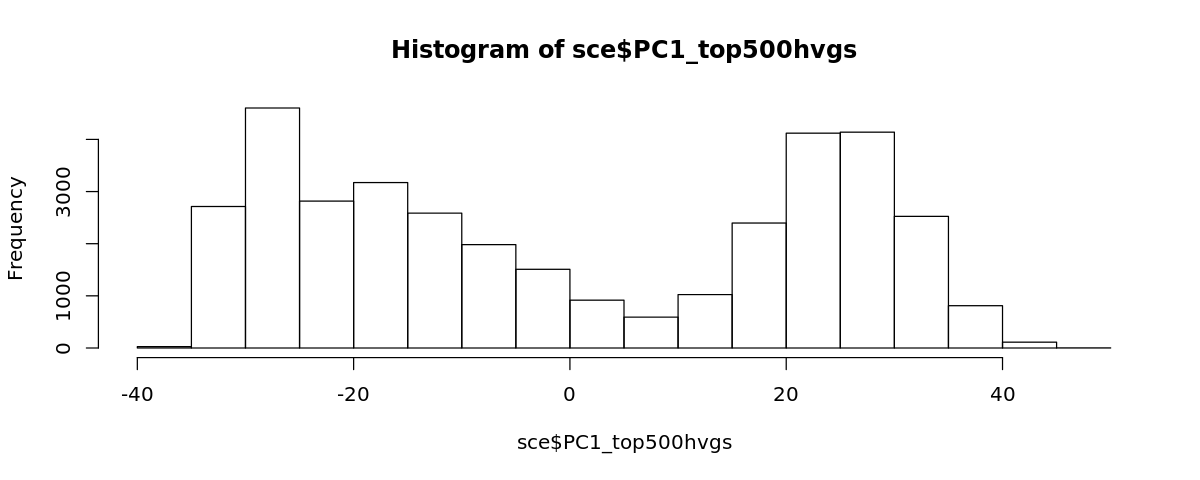

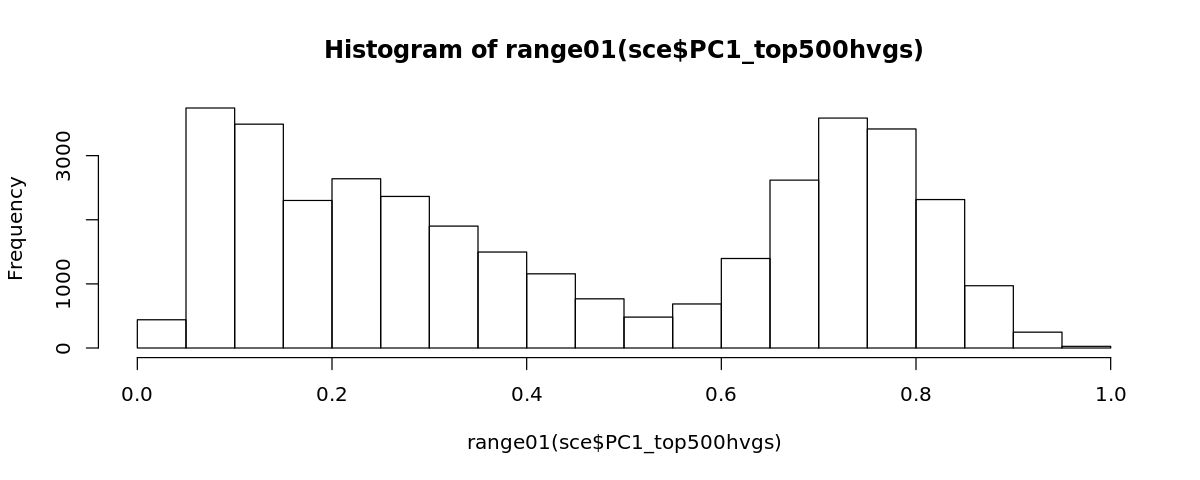

In [17]:
options(repr.plot.width = 10, repr.plot.height = 4) 
hist(sce$PC1_top500hvgs)
range01 <- function(x){(x-min(x))/(max(x)-min(x))}
hist(range01(sce$PC1_top500hvgs))

In [44]:
sce$forced_stage = "not assigned"
# just assign all day0 cells to ips
sce[,sce$day == "day0"]$forced_stage = "ips"
# still based on not scale PC1, since those are the criteria used for eQTLs
sce[,sce$PC1_top500hvgs  > -23 & sce$PC1_top500hvgs < 10 & sce$day %in% c("day1","day2")]$forced_stage = "mesendo"
sce[,sce$PC1_top500hvgs  > 10 & sce$day %in% c("day2","day3")]$forced_stage = "defendo"

In [45]:
# sce.ips1 = sce[,sce$forced_stage == "ips"]
sce.mesendo1 = sce[,sce$forced_stage == "mesendo"]
sce.defendo1 = sce[,sce$forced_stage == "defendo"]

In [46]:
ncol(sce.defendo1)
length(unique(sce.defendo1$donor_short_id))

[1] 15109

[1] 117

In [47]:
ncol(sce.mesendo1)
length(unique(sce.mesendo1$donor_short_id))

[1] 10420

[1] 124

In [48]:
sceset = sce.mesendo1
mysce = sceset[,sceset$day == "day1"]
mat = table(mysce$donor_short_id, mysce$experiment) 
ord = which(table(mysce$donor_short_id, mysce$experiment) > 0, arr.ind = T)
l = c()
for (i in 1:dim(ord)[1]){
    l[i] <- paste0(rownames(mat)[ord[i,1]],"-",colnames(mat)[ord[i,2]])
    }
l1 = paste0(l,"-day1")
mysce = sceset[,sceset$day == "day2"]
mat = table(mysce$donor_short_id, mysce$experiment) 
ord = which(table(mysce$donor_short_id, mysce$experiment) > 0, arr.ind = T)
l = c()
for (i in 1:dim(ord)[1]){
    l[i] <- paste0(rownames(mat)[ord[i,1]],"-",colnames(mat)[ord[i,2]])
    }
l2 = paste0(l,"-day2")
l.mesendo1 <- c(l1,l2)

In [49]:
sceset = sce.defendo1
mysce = sceset[,sceset$day == "day2"]
mat = table(mysce$donor_short_id, mysce$experiment) 
ord = which(table(mysce$donor_short_id, mysce$experiment) > 0, arr.ind = T)
l = c()
for (i in 1:dim(ord)[1]){
    l[i] <- paste0(rownames(mat)[ord[i,1]],"-",colnames(mat)[ord[i,2]])
    }
l2 = paste0(l,"-day2")
mysce = sceset[,sceset$day == "day3"]
mat = table(mysce$donor_short_id, mysce$experiment) 
ord = which(table(mysce$donor_short_id, mysce$experiment) > 0, arr.ind = T)
l = c()
for (i in 1:dim(ord)[1]){
    l[i] <- paste0(rownames(mat)[ord[i,1]],"-",colnames(mat)[ord[i,2]])
    }
l3 = paste0(l,"-day3")
l.defendo1 <- c(l2,l3)

In [50]:
length(l.mesendo1)
length(l.defendo1)

[1] 233

[1] 242

In [37]:
get_means_byexpt <- function(sceset, ngenes, l){
    n = length(l)
    means <- matrix(0,nrow = ngenes, ncol = n)
    for (i in 1:n){
        don = gsub("*-.*","",l[i])
        expt = gsub("*-.*","",gsub(".*-e","e",l[i]))
        day = gsub(".*-","",l[i])
        sc <- logcounts(sceset)[,sceset$donor_short_id == don & sceset$experiment == expt & sceset$day == day]
        # print(length(sc))
        if (length(sc) == nrow(sceset)) {means[,i] <- sc}
        else {means[,i] <- rowMeans(sc)}
    }
    rownames(means) = rownames(sceset)
    colnames(means) = l
    means
}

In [38]:
m.mesendo1 = get_means_byexpt(sce.mesendo1, nrow(sce.mesendo1), l.mesendo1)

In [39]:
m.mesendo1[1:5,1:5]

,fafq_1-expt_09-day1,hiaf_2-expt_09-day1,iisa_3-expt_09-day1,joxm_1-expt_09-day1,lexy_1-expt_09-day1
ENSG00000000003_TSPAN6,5.7615358,5.561218,5.4910210,5.859566,5.9604903
ENSG00000000419_DPM1,6.5092906,5.714651,6.5671030,6.385494,6.5926775
ENSG00000000457_SCYL3,0.7210118,1.165083,0.4922124,0.564786,0.2898621
ENSG00000000460_C1orf112,3.0668233,3.161389,3.6761016,3.275137,3.9518425
ENSG00000001036_FUCA2,2.6229137,3.170704,2.6636231,3.048088,3.5199853


In [40]:
write.table(m.mesendo1, "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/eQTL_mapping/input_files/forced_mesendo_pheno.txt", sep = "\t", quote = F, col.names = NA)

In [42]:
pcs.mesendo1 = prcomp(t(m.mesendo1))$x[,1:10]
head(pcs.mesendo1,2)
write.table(pcs.mesendo1, "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/eQTL_mapping/input_files/forced_mesendo_covs_10pcs.txt", sep = "\t", quote = F, col.names = NA)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
fafq_1-expt_09-day1,-8.754445,11.1769432,-26.38612,6.706494,-10.67095,1.871586,-5.821928,1.221116,-4.697190,6.889453
hiaf_2-expt_09-day1,-13.413721,0.1536573,-22.67356,7.412914,-13.21199,10.512984,-8.448057,-5.405259,-2.003986,3.795115


In [44]:
smf.mesendo1 = make_sample_mapping(m.mesendo1, sce.mesendo1)
head(smf.mesendo1,2)
write.table(smf.mesendo1, "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/eQTL_mapping/input_files/forced_mesendo_smf.txt", sep = "\t", quote = F, row.names = F, col.names = F)

HPSI0314i-fafq_1,fafq_1-expt_09-day1
HPSI1013i-hiaf_2,hiaf_2-expt_09-day1


In [45]:
m.defendo1 = get_means_byexpt(sce.defendo1, nrow(sce.defendo1), l.defendo1)

In [46]:
m.defendo1[1:5,1:5]

,dixh_2-expt_21-day2,fawm_2-expt_21-day2,koqx_1-expt_21-day2,naju_1-expt_21-day2,oebj_1-expt_21-day2
ENSG00000000003_TSPAN6,4.2274143,4.168063,3.8189090,4.4201077,3.840111
ENSG00000000419_DPM1,3.6809596,3.842825,4.0565865,4.2165829,4.212424
ENSG00000000457_SCYL3,0.6357458,0.813654,0.4344262,0.1440102,1.383384
ENSG00000000460_C1orf112,1.6622016,1.983940,2.4881546,2.0862696,2.797275
ENSG00000001036_FUCA2,2.2192760,3.007631,2.8979089,1.4821022,1.488293


In [47]:
write.table(m.defendo1, "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/eQTL_mapping/input_files/forced_defendo_pheno.txt", sep = "\t", quote = F, col.names = NA)

In [49]:
pcs.defendo1 = prcomp(t(m.defendo1))$x[,1:10]
head(pcs.defendo1,2)
write.table(pcs.defendo1, "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/eQTL_mapping/input_files/forced_defendo_covs_10pcs.txt", sep = "\t", quote = F, col.names = NA)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
dixh_2-expt_21-day2,-43.25272,-33.01221,5.082762,-3.361614,25.56336,-1.5513061,2.0340405,-2.72664,4.286802,-0.5388399
fawm_2-expt_21-day2,-40.23332,-34.13291,1.507649,-3.186543,28.08053,-0.6407226,0.1882597,-4.95003,10.338798,-0.3082457


In [51]:
smf.defendo1 = make_sample_mapping(m.defendo1, sce.defendo1)
head(smf.defendo1,2)
write.table(smf.defendo1, "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/eQTL_mapping/input_files/forced_defendo_smf.txt", sep = "\t", quote = F, row.names = F, col.names = F)

HPSI0614i-dixh_2,dixh_2-expt_21-day2
HPSI0215i-fawm_2,fawm_2-expt_21-day2


In [ ]:
###########################

In [53]:
transit.file = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/eQTL_mapping/output_files/transitioning/top_qtl_results_all.txt"
transit.leads = read.csv(transit.file, sep = "\t")
head(transit.leads,2)

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,hgnc_symbol,combined_feature_id,⋯,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id
16_27888526_A_G,0.004967102,-0.2061577,0.07338767,0.3689214,16,27561454,27791690,KIAA0556,ENSG00000047578_KIAA0556,⋯,313,0.6535303,42.28380,16,27888526,G,1,0.4153355,0.02013158,ENSG00000047578_KIAA0556
16_27386394_C_G,0.001861055,0.2505596,0.08052554,0.1552558,16,27470876,27561234,GTF3C1,ENSG00000077235_GTF3C1,⋯,313,0.6540541,39.12358,16,27386394,G,1,0.2939297,0.89166791,ENSG00000077235_GTF3C1


In [60]:
transit.leads$global_corr_p_value = qvalue(transit.leads$empirical_feature_p_value)$qvalues
nrow(transit.leads)
nrow(transit.leads[transit.leads$global_corr_p_value < 0.1,])

[1] 10924

[1] 227

In [60]:
mesendo1.file = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/eQTL_mapping/output_files/forced_mesendo/top_qtl_results_all.txt"
mesendo1.leads = read.csv(mesendo1.file, sep = "\t")
head(mesendo1.leads,2)

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,hgnc_symbol,combined_feature_id,⋯,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,⋯,<int>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
16_27835727_G_A,0.006547968,0.4674537,0.1719212,0.4483196,16,27561454,27791690,KIAA0556,ENSG00000047578_KIAA0556,⋯,233,0.6568355,42.65404,16,27835727,A,1,0.0751073,1.0000000,ENSG00000047578_KIAA0556
16_27429332_A_T,0.041004790,0.2366723,0.1158182,0.8876056,16,27470876,27561234,GTF3C1,ENSG00000077235_GTF3C1,⋯,233,0.6746675,38.51057,16,27429332,T,1,0.1094421,0.4931177,ENSG00000077235_GTF3C1


In [23]:
H5close()

In [43]:
GetTopResults <- function(results.folder, multiple.testing.global = "ST") {
  observed.features <- 0
  results <- NULL
  files.to.read <- list.files(results.folder,pattern = "qtl_results.*h5", full.names = T)
#      print(files.to.read)
    for ( i in files.to.read ) {
#     print(i)
        H5close()
    tmp <- h5dump(i)
    if ( length(tmp) > 0 ) {
      for ( j in names(tmp) ) { tmp[[j]][["feature"]] <- j }
      observed.features = observed.features + length(tmp)
      df <- bind_rows(tmp)
 #   print (head(df))
      if ( nrow(df) > 0 ) { 
          df <- df[,!(colnames(df) %in% c("group","name", "otype", "dclass",  "dim"))]
          results = rbind(results,df) }
    }
  }
  H5close()
  if ( length(which(is.na(results$empirical_feature_p_value))) != 0 ) {
    results <- results[-which(is.na(results$empirical_feature_p_value)),]
  }
  ##Multiple testing
  if ( multiple.testing.global == "ST" ) {
    results <- results[order(results$empirical_feature_p_value, results$p_value ),]
    #get best SNP per feature
    results <- results[-which(duplicated(results$feature)),]
    
    results["global_corr_p_value"] <- qvalue(results$empirical_feature_p_value)$qvalues
      
  } else if ( multiple.testing.global == "BF" ) {
    results["global_corr_p_value"] <- results$empirical_feature_p_value*observed.features
    results$global_corr_p_value[results$global_corr_p_value > 1] <- 1
  }
  results <- results[order(results$global_corr_p_value, results$empirical_feature_p_value, results$p_value ),]
  snp_info = as_data_frame(do.call("rbind", lapply(strsplit(results$snp_id, "_"), function(x) t(as.data.frame(x)))))
  colnames(snp_info) = c("chrom","pos","ref_allele","alt_allele")
  results = cbind(results,snp_info)
  results$chrom = as.integer(results$chrom)
  results$pos = as.integer(results$pos)
  results
}

In [59]:
mesendo1.folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/eQTL_mapping/output_files/forced_mesendo/"
mesendo1.leads = GetTopResults(mesendo1.folder)

HDF5: unable to open file


ERROR: Error in h5checktypeOrOpenLoc(file, native = native): Error in h5checktypeOrOpenLoc(). File '/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/eQTL_mapping/output_files/forced_mesendo/qtl_results_12_115737393_116956625.h5' is not a valid HDF5 file.


In [46]:
i = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/eQTL_mapping/output_files/forced_mesendo/qtl_results_1_184535645_185287662.h5"

In [47]:
h5ls(i)

HDF5: unable to open file


ERROR: Error in h5checktypeOrOpenLoc(file, readonly = TRUE, native = native): Error in h5checktypeOrOpenLoc(). File '/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/eQTL_mapping/output_files/forced_mesendo/qtl_results_1_184535645_185287662.h5' is not a valid HDF5 file.


In [ ]:
# nrow(mesendo1.leads[mesendo1.leads$global_corr_p_value < 0.1,])

In [ ]:
mesendo1.leads$global_corr_p_value = qvalue(mesendo1.leads$empirical_feature_p_value)$qvalues
nrow(mesendo1.leads)
nrow(mesendo1.leads[mesendo1.leads$global_corr_p_value < 0.1,])

In [12]:
defendo1.file = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/eQTL_mapping/output_files/forced_defendo/top_qtl_results_all.txt"
defendo1.leads1 = read.csv(defendo1.file, sep = "\t")
head(defendo1.leads1,2)

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,hgnc_symbol,combined_feature_id,⋯,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,⋯,<int>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
16_27853481_C_T,0.003763352,-0.2105776,0.07267950,0.3157944,16,27561454,27791690,KIAA0556,ENSG00000047578_KIAA0556,⋯,242,0.6657353,40.68788,16,27853481,T,1,0.4111570,0.14419488,ENSG00000047578_KIAA0556
16_27419063_T_C,0.070731265,0.1662148,0.09197374,0.9636816,16,27470876,27561234,GTF3C1,ENSG00000077235_GTF3C1,⋯,242,0.6196728,38.21795,16,27419063,C,1,0.1942149,0.01246179,ENSG00000077235_GTF3C1


In [13]:
defendo1.leads1$global_corr_p_value = qvalue(defendo1.leads1$empirical_feature_p_value)$qvalues
nrow(defendo1.leads1)
nrow(defendo1.leads1[defendo1.leads1$global_corr_p_value < 0.1,])

[1] 10924

[1] 1217

In [16]:
m.defendo1 = read.table("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/eQTL_mapping/input_files/forced_defendo_pheno.txt", sep = "\t")
nrow(m.defendo1)

[1] 11232